## Chapter 5
Snippets for the chapter 5

Load data

In [2]:
import pandas as pd

df = pd.read_csv('data/longevity.csv')
df.shape

(1000, 2)

Create density plot of 1,000 people’s life spans, facetted by smokers

C:\Users\dazb\AppData\Local\Continuum\anaconda3\lib\site-packages\plotnine\utils.py:281: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()
C:\Users\dazb\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\dazb\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


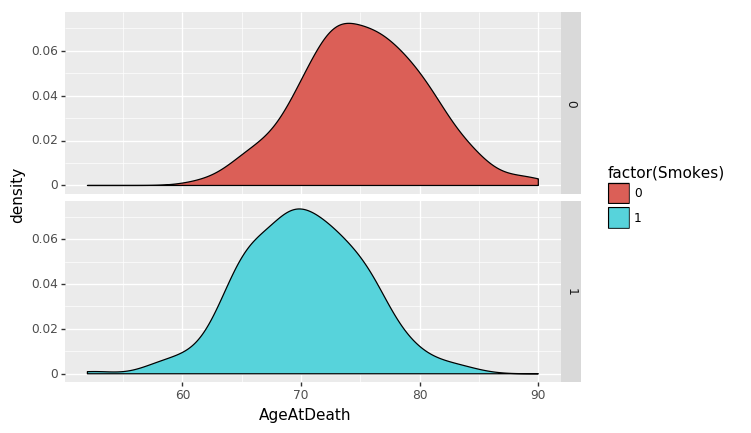

<ggplot: (-9223371877955002403)>

In [7]:
%matplotlib inline
from plotnine import *

fig = (
    ggplot(data = df, mapping=aes(x = 'AgeAtDeath',  fill = 'factor(Smokes)')) +
    geom_density() +
    facet_grid(('Smokes', '.'))
)

fig

Calculate MSE using the mean of AgeAtDeath (73)

In [11]:
import numpy as np

guess = 73
np.square(df['AgeAtDeath'] - guess).mean()

32.991